<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-пункту" data-toc-modified-id="Вывод-по-пункту-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по пункту</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-пункту" data-toc-modified-id="Вывод-по-пункту-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод по пункту</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-пункту" data-toc-modified-id="Вывод-по-пункту-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод по пункту</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#🎓-Комментарий-от-студента-(синий)" data-toc-modified-id="🎓-Комментарий-от-студента-(синий)-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></a></span></li><li><span><a href="#🎓-Комментарий-от-студента-(синий)" data-toc-modified-id="🎓-Комментарий-от-студента-(синий)-4.0.0.2"><span class="toc-item-num">4.0.0.2&nbsp;&nbsp;</span>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Бонус" data-toc-modified-id="Бонус-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Бонус</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#🎓-Комментарий-от-студента-(синий)" data-toc-modified-id="🎓-Комментарий-от-студента-(синий)-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Столбцы из DF:
- 1) RowNumber — индекс строки в данных
- 2) CustomerId — уникальный идентификатор клиента
- 3) Surname — фамилия
- 4) CreditScore — кредитный рейтинг
- 5) Geography — страна проживания
- 6) Gender — пол
- 7) Age — возраст
- 8) Tenure — сколько лет человек является клиентом банка
- 9) Balance — баланс на счёте
- 10) NumOfProducts — количество продуктов банка, используемых клиентом
- 11)  HasCrCard — наличие кредитной карты
- 12)  IsActiveMember — активность клиента
- 13) - EstimatedSalary — предполагаемая зарплата
- 14)  Целевой признак
- 15)  Exited — факт ухода клиента

Не интересны следующие столбцы :
- 1) ID
- 2) индекс
- 3) фамилия

In [1]:
# подгрузка библиотек 
import pandas as pd
import seaborn as se
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

In [2]:
pd.set_option('display.max_columns', 50) #максимальное колличество колонок отображения 

pth1 = '/datasets/Churn.csv'
pth2 = 'Churn.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Incorrect file path')


df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Из инфо можно заметить что не которые столбцы можно преобразовать в другой тип данных

In [3]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1) #убираються не нужные для нашего иследования столбцы 

In [4]:
df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

df['Tenure'] = df['Tenure'].fillna(0).astype(int)
print(f'Колличество дубликатов в df: {df.duplicated().sum()}') #Дубликатов не было обнаруженно 

Колличество дубликатов в df: 0


In [5]:
df.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CreditScore      10000 non-null  int64 
 1   Geography        10000 non-null  object
 2   Gender           10000 non-null  object
 3   Age              10000 non-null  int64 
 4   Tenure           10000 non-null  int32 
 5   Balance          10000 non-null  int32 
 6   NumOfProducts    10000 non-null  int64 
 7   HasCrCard        10000 non-null  int64 
 8   IsActiveMember   10000 non-null  int64 
 9   EstimatedSalary  10000 non-null  int32 
 10  Exited           10000 non-null  int64 
dtypes: int32(3), int64(6), object(2)
memory usage: 742.3+ KB


### Вывод по пункту
В данном пункте было:
- прочитан файл с данными
- подгруженны библиотеки 
- Убираються стобцы и изменяеться тип данных

## Исследование задачи

Колличество людей не ушедшие из банка: 7963
Колличество людей ушедших из банка 2037


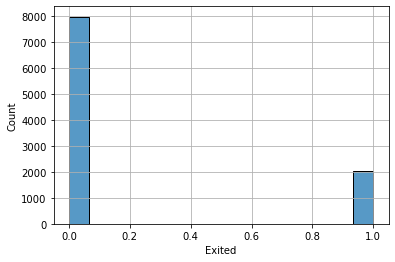

In [6]:
#df['Exited'].hist()
se.histplot(data=df['Exited'])
plt.grid(True)
num_null = (df['Exited'] == 0).sum()
num_ed = (df['Exited'] == 1).sum()
print(f'Колличество людей не ушедшие из банка: {num_null}')
print(f'Колличество людей ушедших из банка {num_ed}')
#print(f'Колличество людей ушедвиш: {(df['Exited']==1).sum()}')

In [7]:
display(df.corr()) 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,0.011225,-0.013319
Balance,0.006268,0.028308,-0.005821,1.000000,-0.304179,-0.014858,-0.010084,0.012798,0.118533
NumOfProducts,0.012238,-0.030680,0.010106,-0.304179,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.011225,0.012798,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.013319,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Как можно заметить что корреляция между уходами из банка и другими факторами являються слишком малло кореллирование, наибольшее значение корреляции имееться у столбца возраст из-за этого строиться график

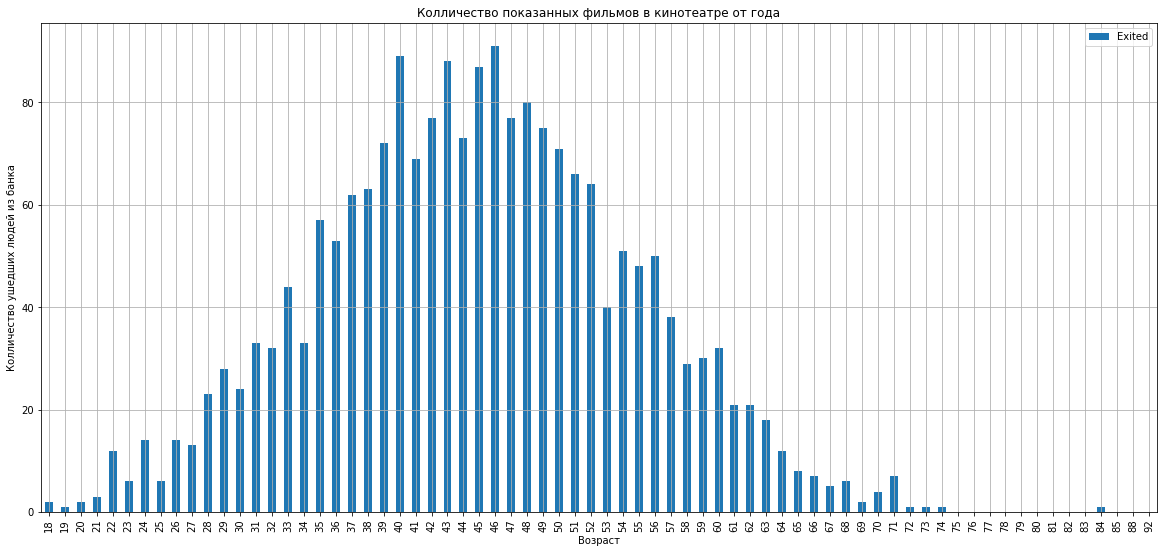

In [8]:
piv_age_exit = df.pivot_table(index='Age',
                             values = 'Exited',
                             aggfunc = 'sum')
piv_age_exit.plot(kind='bar',figsize = (20,9),
                  title='Колличество показанных фильмов в кинотеатре от года',
                  grid=True, legend=True,
                  xlabel='Возраст',ylabel='Колличество ушедших людей из банка',
                  fontsize = 10, y = 'Exited')
plt.show()

### Вывод по пункту
- Была построенна гистограмма по столбцу Exited, на которой замететн сильный расбаланс в 4 раза
- Проверенна корелляция между столцами наибольшее среди всех корелляция возраст и уход, но все скорее связь не явная состоит между факторами  

## Борьба с дисбалансом

In [9]:
df_ohe=pd.get_dummies(df,drop_first=True) #убираються категориальные признаки

In [10]:
target = df_ohe['Exited'] 
features = df_ohe.drop(['Exited'],axis=1)

features_train_valid, features_test,target_train_valid, target_test = train_test_split(
    features,target, test_size=0.2,random_state=1234)


features_train,features_valid,target_train,target_valid=train_test_split(
    features_train_valid,target_train_valid,test_size=0.2,random_state=1234)
print(features_test.shape)
print(features_train.shape)
print(features_valid.shape)

(2000, 11)
(6400, 11)
(1600, 11)


In [11]:
numeric=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

# Стандартизация выборок 

scaler=StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric]  = scaler.transform(features_test[numeric])


In [12]:
max_f_one_t, depth, model_t =0,0,None
for dep in range(1,20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=dep)
    model.fit(features_train,target_train)
    pred = model.predict(features_valid)
    f_one = f1_score(target_valid,pred)
    if f_one>max_f_one_t:
        max_f_one_t = f_one
        depth = dep
        model_t = model
r2_tre = model_t.score(features_valid, target_valid).round(3)

print('Решающее дерево')
print(f'Максимальное значение F1 :{max_f_one_t:.3}, при глубине : {depth}')
print('R2:',r2_tre)

Решающее дерево
Максимальное значение F1 :0.54, при глубине : 9
R2: 0.849


In [13]:
max_f_one_f, depth, n_estim, model_f=0,0,0,None
for dep in range(1,15):
    for n_est in range(2,50,3):
        model = RandomForestClassifier(random_state=12345, max_depth=dep,n_estimators = n_est)
        model.fit(features_train,target_train)
        pred = model.predict(features_valid)
        f_one = f1_score(target_valid,pred)
        if f_one>max_f_one_f:
            max_f_one_f = f_one
            depth = dep
            n_estim = n_est
            model_f = model
r2_for = model_f.score(features_valid, target_valid).round(3)
                       
print('Рандомный лес')
print(f'Значение F1 :{max_f_one_f:.3} при глубине : {depth} и колличестве {n_estim}')
print('R2:',r2_for)

Рандомный лес
Значение F1 :0.596 при глубине : 12 и колличестве 23
R2: 0.864


In [3]:
df_disb = pd.DataFrame(data = {'F1':[max_f_one_t.round(3), max_f_one_f.round(3)],
                               'R2':[r2_tre,r2_for]},
                      index = ['Дерево решения','Рандомный лес'])
display(df_disb)

NameError: name 'pd' is not defined

Сверху было проведенно обучение и решения задачи с небалансированной выборкой , как видноиз таблицы выше, максималное значение у рандомного леса 0,595 значение являеться маленьким для решения задачи

In [16]:
features_train.shape # Изначальный размер

(6400, 11)

In [17]:
def upsampling (fea,tar,repeat):
    target_one = tar[tar==1]
    target_null = tar[tar==0]
    features_one = fea[tar==1]
    features_null = fea[tar==0]
    
    features_upsampling = pd.concat([features_null]+[features_one]*repeat)
    target_upsampling = pd.concat([target_null]+[target_one]*repeat)

    features_upsampling,target_upsampling = shuffle(features_upsampling,target_upsampling,random_state=1234)
    
    return features_upsampling,target_upsampling

In [18]:
features_bal_up,target_bal_up = upsampling(features_train,target_train,6)
features_bal_up.shape # Увеличенный размер 

(12900, 11)

In [19]:
def downsampling(features,target,fraction):
    features_null = features[target==0]
    features_one = features[target==1]
    target_null = target[target==0]
    target_one = target[target==1]
    
    features_downsampling = pd.concat([features_null.sample(frac=fraction,random_state=1234)]+[features_one])
    target_downsampling = pd.concat([target_null.sample(frac=fraction,random_state=1234)]+[target_one])
    
    features_downsampling,target_downsampling = shuffle(features_downsampling,target_downsampling,random_state=1234)
    return features_downsampling,target_downsampling


In [20]:
features_bal_dow,target_bal_dow = downsampling(features_train,target_train,0.3)
features_bal_dow.shape # Уменьшенный размер  

(2830, 11)

В коде выше было написано две функции использующиее для балансировки (борьбы с дисбалансом) Одна увеличивающая значение выборки а вторая уменьшает значение выборки 

In [21]:
max_tre_one_up, depth =0,0
model_t_up = None
for dep in range(1,20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=dep)
    model.fit(features_bal_up,target_bal_up)
    pred = model.predict(features_valid)
    f_one = f1_score(target_valid,pred)
    if f_one>max_tre_one_up:
        max_tre_one_up = f_one
        depth = dep
        model_t_up = model
        
r2_tre_up = model_t_up.score(features_valid, target_valid)
model_tree = model_t_up
print('При увелечении значения выборки для решающего дерева')
print(f'Максимальное значение F1 :{max_tre_one_up:.3}, при глубине : {depth}')
print('Значения R2:',r2_tre_up)

При увелечении значения выборки для решающего дерева
Максимальное значение F1 :0.569, при глубине : 8
Значения R2: 0.75


In [22]:
max_tre_one_dow, depth =0,0
model_t_dow = None
for dep in range(1,20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=dep)
    model.fit(features_bal_dow,target_bal_dow)
    pred = model.predict(features_valid)
    f_one = f1_score(target_valid,pred)
    if f_one>max_tre_one_dow:
        max_tre_one_dow = f_one
        depth = dep
        model_t_dow = model
        
r2_tre_dow = model_t_dow.score(features_valid, target_valid)

print('При уменьшении значения выборки для решающего дерева')
print(f'Значение F1 :{max_tre_one_dow:.3}, при глубине : {depth}')
print('Значения R2:',r2_tre_dow)

При уменьшении значения выборки для решающего дерева
Значение F1 :0.577, при глубине : 7
Значения R2: 0.8


In [23]:
max_for_one_up, depth, n_estim =0,0,0
model_f_up = None

for dep in range(1,15):
    for n_est in range(2,50,3):
        model = RandomForestClassifier(random_state=12345, max_depth=dep,n_estimators = n_est)
        model.fit(features_bal_up,target_bal_up)
        pred = model.predict(features_valid)
        f_one = f1_score(target_valid,pred)
        if f_one>max_for_one_up:
            max_for_one_up = f_one
            depth = dep
            n_estim = n_est
            model_f_up = model
            
model_forest = RandomForestClassifier(random_state=12345, max_depth=depth,n_estimators = n_estim).fit(features_bal_up,target_bal_up)
r2_for_up = model_forest.score(features_valid, target_valid)
print('При увелечении значения выборки для случайного леса')
print(f'Значение F1 :{max_for_one_up:.3} при глубине : {depth} и колличестве {n_estim}')
print('Значения R2:',r2_for_up)


При увелечении значения выборки для случайного леса
Значение F1 :0.627 при глубине : 13 и колличестве 23
Значения R2: 0.833125


In [24]:
max_for_one_dow, depth, n_estim =0,0,0
model_f_dow = None

for dep in range(1,15):
    for n_est in range(2,50,3):
        model = RandomForestClassifier(random_state=12345, max_depth=dep,n_estimators = n_est)
        model.fit(features_bal_dow,target_bal_dow)
        pred = model.predict(features_valid)
        f_one = f1_score(target_valid,pred)
        if f_one>max_for_one_dow:
            max_for_one_dow = f_one
            depth = dep
            n_estim = n_est
            model_f_dow = model

r2_for_dow = model_f_dow.score(features_valid, target_valid)

print('При уменьшении значения выборки для случайного леса ')
print(f'Значение F1 :{max_for_one_dow:.3} при глубине : {depth} и колличестве {n_estim}')
print('Значения R2:',r2_for_dow)

При уменьшении значения выборки для случайного леса 
Значение F1 :0.613 при глубине : 10 и колличестве 44
Значения R2: 0.813125


In [25]:
model_logis_up=LogisticRegression().fit(features_bal_up,target_bal_up)
pred = model_logis_up.predict(features_valid)
log_f1_up = f1_score(target_valid,pred)
r2_log_up = model_logis_up.score(features_valid, target_valid)

print('При увелечении значения выборки для логической регрессии')
print('Значение F1:',log_f1_up)
print('Значение R2:',r2_log_up)

При увелечении значения выборки для логической регрессии
Значение F1: 0.4646288209606987
Значение R2: 0.616875


In [26]:
model_logis_dow = LogisticRegression().fit(features_bal_dow,target_bal_dow)
pred = model_logis_dow.predict(features_valid)
log_f1_dow = f1_score(target_valid,pred)
r2_log_dow = model_logis_dow.score(features_valid, target_valid)

print('При уменьшении значения выборки для логической регрессии')
print('Значение F1:',log_f1_dow)
print('Значение R2:',r2_log_dow)

При уменьшении значения выборки для логической регрессии
Значение F1: 0.507177033492823
Значение R2: 0.7425


In [27]:
df_dow_up = pd.DataFrame(data = {'F1':[max_tre_one_up.round(3), max_tre_one_dow.round(3),
                                       max_for_one_up.round(3), max_for_one_dow.round(3),
                                       log_f1_up.round(3), log_f1_dow.round(3)],
                                 'R2':[r2_tre_up.round(3),r2_tre_dow.round(3),
                                       r2_for_up.round(3),r2_for_dow.round(3),
                                       r2_log_up.round(3),r2_log_dow.round(3)]},
                         index = ['Дерево решения с увелечением','Дерево решения с уменьшением',
                                  'Рандомный лес с увелечением','Рандомный лес с уменьшением',
                                  'Логическая регрессия с увелечением','Логическая регрессия с уменьшением'])
display(df_dow_up)

,F1,R2
Дерево решения с увелечением,0.569,0.750
Дерево решения с уменьшением,0.577,0.800
Рандомный лес с увелечением,0.627,0.833
Рандомный лес с уменьшением,0.613,0.813
Логическая регрессия с увелечением,0.465,0.617
Логическая регрессия с уменьшением,0.507,0.742


### Вывод по пункту 
В данном пункте было реализованно:
- две функции одна увеличивающая значение другая уменьшающая значение выборки, наиболее плохо показали данные которые были уменьшены (в 2 раза хуже)
- Произведенно обучение на двух разных выборках и было найденно то что лучшая модель являеться Рандомный лесс с у величенной выборкой 

## Тестирование модели

В данном пункте будут находиться площадь под кривой ROC (кривая ошибок), а также построенные графики ROC для лучших моделей обученных выше 

In [28]:
print('Значение решающего дерева на тестовой выборке')
pred = model_f_up.predict(features_test)
for_f1_test = f1_score(target_test,pred)
r2_for_test = model_f_up.score(features_test, target_test)
print(f'F1 : {for_f1_test} и R2: {r2_for_test}')

Значение решающего дерева на тестовой выборке
F1 : 0.591743119266055 и R2: 0.822


In [29]:
probab_tree = model_tree.predict_proba(features_valid)
probab_one_valid_tree = probab_tree[:,1]
fpr_tree,tpr_tree,thresholds = roc_curve(target_valid,probab_one_valid_tree)
auc_roc_tree = roc_auc_score(target_valid,probab_one_valid_tree)

In [30]:
probab_forest = model_forest.predict_proba(features_valid)
probab_one_valid_forest = probab_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(target_valid,probab_one_valid_forest)
auc_roc_forest = roc_auc_score(target_valid,probab_one_valid_forest)

In [31]:
probab_logis = model_logis_dow.predict_proba(features_valid)
probab_one_valid_logis = probab_logis[:,1]
fpr_logis,tpr_logis,thresholds_logis = roc_curve(target_valid,probab_one_valid_logis)
auc_roc_logis = roc_auc_score(target_valid,probab_one_valid_logis)

In [32]:
df_auc_roc = pd.DataFrame(data = {'auc_roc':[auc_roc_tree.round(3),
                                             auc_roc_forest.round(3),
                                             auc_roc_logis.round(3),]},
                          index = ['Решающее дерево',
                                   'Рандомный лес',
                                   'Логическая регресия'])
display(df_auc_roc)

,auc_roc
Решающее дерево,0.839
Рандомный лес,0.844
Логическая регресия,0.772


<Figure size 432x288 with 0 Axes>

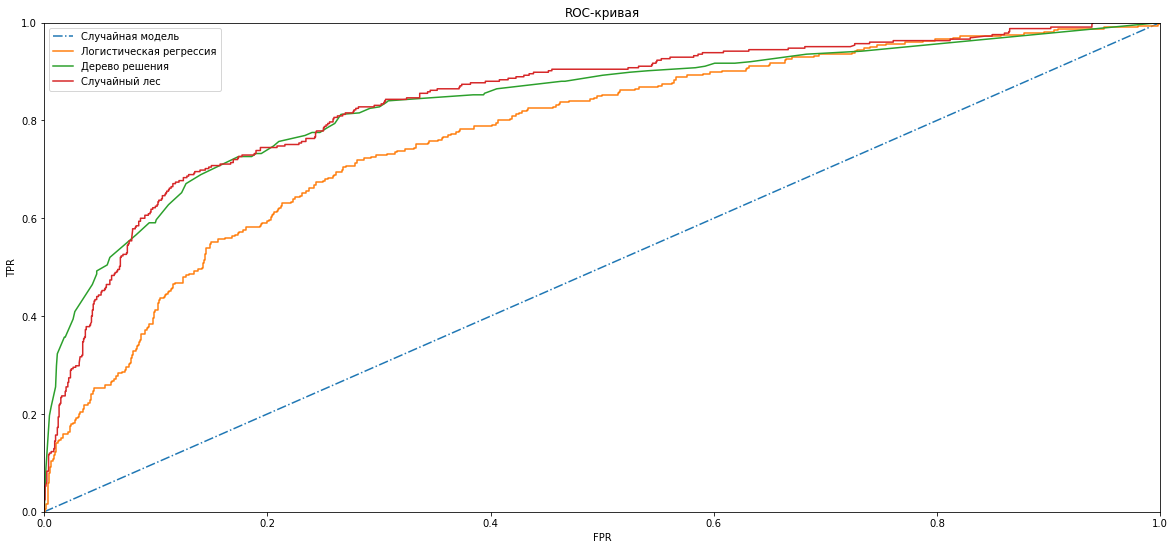

In [33]:
plt.figure()

plt.figure(figsize=(20,9))
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_logis,tpr_logis)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Логистическая регрессия','Дерево решения','Случайный лес'),
           loc= 'upper left')
plt.show()

In [34]:
model = RandomForestClassifier(random_state=12345, max_depth=13,n_estimators = 23)
model.fit(features_bal_up,target_bal_up)
pred = model.predict(features_test)
f_one = f1_score(target_test,pred)
print(f'Значение тестовой выборки  F1: {f_one}, R2: {model.score(features_test, target_test)}')

# вариант 2 

#features = pd.concat([features_bal_up,featuret_valid])
#target = pd.contact([target_bal_up,target_valid])
#model = RandomForestClassifier(random_state=12345, max_depth=13,n_estimators = 23)
#model.fit(features,target)
#pred = model.predict(features_test)
#f_one = f1_score(target_test,pred)
#print(f'Значение тестовой выборки  F1: {f_one}, R2: {model.score(features_test, target_test)}')

Значение тестовой выборки  F1: 0.591743119266055, R2: 0.822


Если посмотреть на таблицу указанную выше и график то видно что площадь под кривой больше у Рандомного леса что говорит  классификатор работает хорошо так как выше значения 0.5, которое равно гаданию

## Бонус

In [35]:
from sklearn.model_selection import cross_validate
model_tree = DecisionTreeClassifier(random_state=12345, max_depth=9)
model_forest = RandomForestClassifier(random_state=12345, max_depth=13,n_estimators = 38)
model_logis=LogisticRegression()

tree = cross_validate(model_tree,features_bal_up,target_bal_up, cv=5, scoring=['f1','roc_auc','r2'])
forest = cross_validate(model_forest,features_bal_up,target_bal_up,cv=5,scoring=['f1','roc_auc','r2'])
logis = cross_validate(model_logis,features_bal_up,target_bal_up,cv=5,scoring=['f1','roc_auc','r2'])


df_cross = pd.DataFrame(data = {'F1':[tree['test_f1'].max().round(3),
                                      forest['test_f1'].max().round(3),
                                      logis['test_f1'].max().round(3)],
                                'roc_auc' :[tree['test_roc_auc'].max().round(3),
                                            forest['test_roc_auc'].max().round(3),
                                            logis['test_roc_auc'].max().round(3) ],
                                'R2' :[tree['test_r2'].max().round(3),
                                       forest['test_r2'].max().round(3),
                                       logis['test_r2'].max().round(3)] },
                        index = ['Значение для Решающего дерева',
                                 'Значение для Рандомного леса',
                                 'Значение для логической регресии'])
display(df_cross)

,F1,roc_auc,R2
Значение для Решающего дерева,0.869,0.906,0.298
Значение для Рандомного леса,0.958,0.992,0.779
Значение для логической регресии,0.795,0.790,-0.096


## Вывод


- В ходе данной работы была разработана модель, котрая может предугадывать покинет ли человек банк или нет, со среднее гармоническим значением  0.609, и а площадь под кривой ROC  равный 0.85 и коэффициент детерминаци равный 0.818, что говорит 81.8 процент ответов будет правильны.
- Так же из анализа были убраны такие столбцы как ID фамилия и индекс (не несут какую либо информацию для данной модели)
- Изменен тип хранения данных в не которых столбцах, ислледована модель с дисбалансом и с балансированной выборкой и построены таблицы.
- Увелечение значения выборки повлияло на средне гармоническое число положительно т.е. значение стало больше

In [2]:
print('Спасибо вам Ревьюеры вы топ') 

Спасибо вам Ревьюеры вы топ


In [36]:
print('Значения не сбалансированной выборки')
display(df_disb)
print('Значения сбалансированной выборки up и dow')
display(df_dow_up)
print('Значения auc_roc для сбалансированной выборки up')
display(df_auc_roc)

Значения не сбалансированной выборки


,F1,R2
Дерево решения,0.540,0.849
Рандомный лес,0.596,0.864
Логическая регрессия,0.315,0.812


Значения сбалансированной выборки up и dow


,F1,R2
Дерево решения с увелечением,0.569,0.750
Дерево решения с уменьшением,0.577,0.800
Рандомный лес с увелечением,0.627,0.833
Рандомный лес с уменьшением,0.613,0.813
Логическая регрессия с увелечением,0.465,0.617
Логическая регрессия с уменьшением,0.507,0.742


Значения auc_roc для сбалансированной выборки up


,auc_roc
Решающее дерево,0.839
Рандомный лес,0.844
Логическая регресия,0.772
